## Import Library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Input gambar

In [3]:
image_path = 'natnat1.jpg'
image_bgr = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

## Lossy

In [4]:
jpeg_quality = [cv2.IMWRITE_JPEG_QUALITY, 10]
result, encoded_image_buffer = cv2.imencode('.jpg', image_bgr, jpeg_quality)

lossy_compressed_bgr = cv2.imdecode(encoded_image_buffer, 1)
lossy_compressed_rgb = cv2.cvtColor(lossy_compressed_bgr, cv2.COLOR_BGR2RGB)

## Kuantisasi Warna

In [5]:
divisor = 256 // levels
quantized_image_rgb = (image_rgb // divisor) * (255 // (levels - 1))


original_size_kb = image_rgb.nbytes / 1024
lossy_size_kb = encoded_image_buffer.nbytes / 1024
quantized_size_kb = quantized_image_rgb.nbytes / 1024

## Menampilkan Hasil

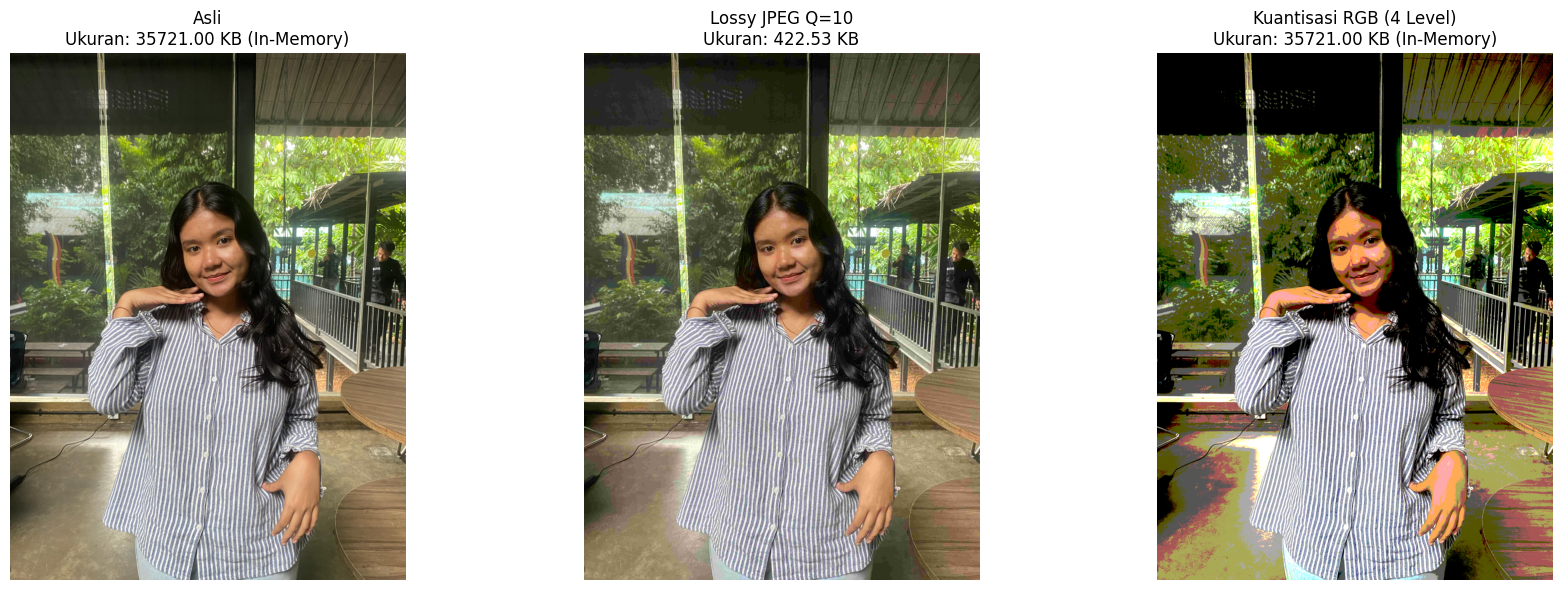

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image_rgb)
axs[0].set_title(f'Asli\nUkuran: {original_size_kb:.2f} KB (In-Memory)')
axs[0].axis('off')

axs[1].imshow(lossy_compressed_rgb)
axs[1].set_title(f'Lossy JPEG Q=10\nUkuran: {lossy_size_kb:.2f} KB')
axs[1].axis('off')

axs[2].imshow(quantized_image_rgb)
axs[2].set_title(f'Kuantisasi RGB (4 Level)\nUkuran: {quantized_size_kb:.2f} KB (In-Memory)')
axs[2].axis('off')

plt.tight_layout()
plt.show()